In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import helper
from tqdm import tqdm

In [2]:
train_data = helper.load_data_from_file("../data/graph_data.json") # dictionary of SMILES and values are graphs

In [3]:
# get all the unique atom types, orbitals and their respective binding energies
atomic_energies = {}
for mol in train_data:
    graph = train_data[mol]
    atom = list(nx.get_node_attributes(graph, "atom_type").values())
    orb = list(nx.get_node_attributes(graph, "orbitals").values())
    energy = list(nx.get_node_attributes(graph, "binding_energies").values())

    for i in range(len(atom)):
        if atom[i] not in atomic_energies:
            atomic_energies[atom[i]] = {}
        for orb_type, orb_energy in zip(orb[i], energy[i]):
            if orb_type == - 1:
                continue
            if orb_type not in atomic_energies[atom[i]]:
                atomic_energies[atom[i]][orb_type] = []
            atomic_energies[atom[i]][orb_type].append(orb_energy)

In [4]:
atomic_energies['S']['1s']

[2490.1, 2483.7, 2478.5]

In [5]:
# average the binding energies for each atom type and orbital
from statistics import mean, stdev

atomic_stats = {}

for atom_type, orbitals in atomic_energies.items():
    atomic_stats[atom_type] = {}
    for orbital, energies in orbitals.items():
        if energies: 
            atomic_stats[atom_type][orbital] = {
                "mean": mean(energies),
                "std": stdev(energies) if len(energies) > 1 else 0 
            }

atomic_stats

{'Ag': {'3d5/2': {'mean': 375.55, 'std': 0}},
 'C': {'1s': {'mean': 291.8558726239662, 'std': 1.9579527137374084}},
 'O': {'1s': {'mean': 539.2427730357822, 'std': 2.638907600052989}},
 'F': {'1s': {'mean': 693.6607373913043, 'std': 3.5319660085321813}},
 'Al': {'2p3/2': {'mean': 80.21000000000001, 'std': 1.0934044692305456}},
 'Ar': {'2s': {'mean': 326.37, 'std': 0}, '2p3/2': {'mean': 248.62, 'std': 0}},
 'As': {'2p3/2': {'mean': 1330.1, 'std': 0.0},
  '3s': {'mean': 212.23333333333332, 'std': 0.1527525231652015},
  '3d': {'mean': 54.8, 'std': 1.6970562748477132}},
 'B': {'1s': {'mean': 195.749609375, 'std': 1.422192692283572}},
 'Br': {'3p3/2': {'mean': 190.08444444444444, 'std': 0.48905805154170684},
  '3d5/2': {'mean': 77.40784615384615, 'std': 4.2220714674152005},
  '3s': {'mean': 264.27, 'std': 0}},
 'N': {'1s': {'mean': 406.23225943396227, 'std': 3.9816820473148846}},
 'P': {'2p3/2': {'mean': 139.14484929078014, 'std': 2.5171986161998707},
  '1s': {'mean': 2154.108888888889, 'st

In [9]:
import pandas as pd
pdtable = pd.read_csv("../data/periodictable.csv", usecols=[0, 2])
pdtable.index = pdtable["AtomicNumber"]
pddict = pdtable['Symbol'].to_dict()
pdflip = dict((v,k) for k,v in pddict.items())

In [10]:
# plot the mean and std of binding energies for each atom type and orbital
atoms = []
orbitals = []
mean_energies = []
std_energies = []

for atom_type, orbital_data in atomic_stats.items():
    for orbital, stats in orbital_data.items():
        atoms.append(atom_type)
        orbitals.append(orbital)
        mean_energies.append(stats["mean"])
        std_energies.append(stats["std"])

In [11]:
atomic_numbers = []
for atom in atoms:
    atomic_numbers.append(pdflip[atom])


In [12]:
sort_idx = np.argsort(atomic_numbers)

In [13]:
atoms = np.array(atoms)[sort_idx]
orbitals = np.array(orbitals)[sort_idx]
mean_energies = np.array(mean_energies)[sort_idx]
std_energies = np.array(std_energies)[sort_idx]


In [53]:
exp_values = pd.read_csv("../data/Isolated_Energy_final.csv")

In [54]:
exp_values

,Z,Element,1s,2s,2p,2p3/2,3s,3p,3p3/2,3d,...,4f5/2,4f7/2,5s,5p,5p3/2,5d,5d5/2,6s,6p,6p3/2
0,1,H,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,He,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Li,54.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Be,111.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,B,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,Ra,103922.0,19237.0,18484.0,15444.0,4822,4490.0,3792.0,3248.0,...,299,299,254,200,153,68.0,68.0,44,19,19
88,89,Ac,106755.0,19840.0,19083.0,15871.0,5002,4656.0,3909.0,3370.0,...,319,319,272,215,167,80.0,80.0,—,—,—
89,90,Th,109651.0,20472.0,19693.0,16300.0,5182,4830.0,4046.0,3491.0,...,342.4,333.1,290,229,182,92.5,85.4,41.4,24.5,16.6
90,91,Pa,112601.0,21105.0,20314.0,16733.0,5367,5001.0,4174.0,3611.0,...,371,360,310,232,232,94.0,94.0,—,—,—


In [65]:
def get_exp_values(atom, orbital):
    if atom not in exp_values['Element'].values:
        return None
    if orbital not in exp_values.columns:
        return None
    return float(exp_values[exp_values['Element'] == atom][orbital].values[0])
    

In [66]:
exp_values.columns

Index(['Z', 'Element', '1s', '2s', '2p', '2p3/2', '3s', '3p', '3p3/2', '3d',
       '3d5/2', '4s', '4p', '4p3/2', '4d', '4d5/2', '4f5/2', '4f7/2', '5s',
       '5p', '5p3/2', '5d', '5d5/2', '6s', '6p', '6p3/2'],
      dtype='object')

In [67]:
exp_values["3p3/2"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
87    3792.0
88    3909.0
89    4046.0
90    4174.0
91    4303.0
Name: 3p3/2, Length: 92, dtype: float64

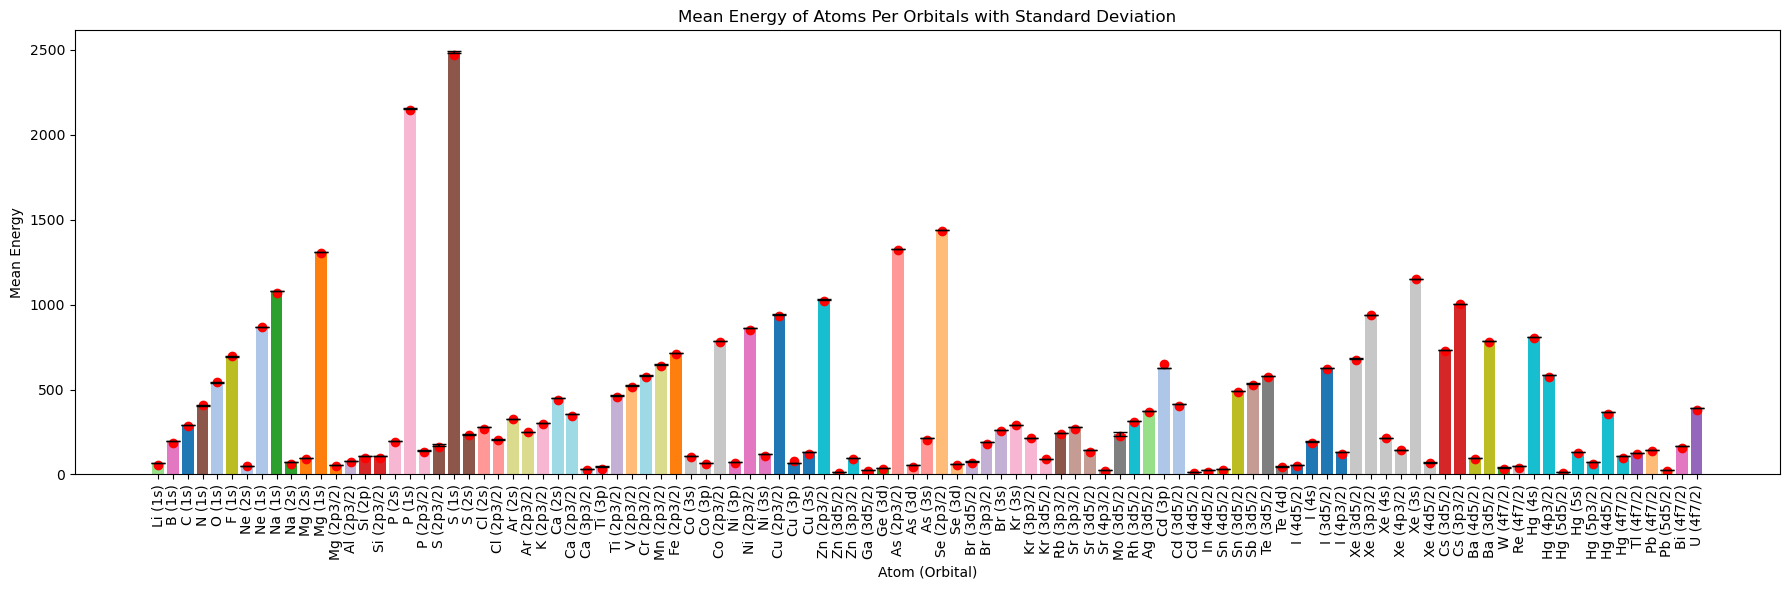

In [69]:
plt.figure(figsize=(18, 6))
unique_atoms = list(set(atoms))
atom_colors = {atom: plt.cm.tab20(i / len(unique_atoms)) for i, atom in enumerate(unique_atoms)}
bar_colors = [atom_colors[atom] for atom in atoms]


plt.bar(
    range(len(mean_energies)),
    mean_energies,
    yerr=std_energies,
    capsize=5,
    tick_label=[f"{a} ({o})" for a, o in zip(atoms, orbitals)],
    color=bar_colors
)
plt.xticks(rotation=90)


# Plot experimental values
for i, (atom, orbital) in enumerate(zip(atoms, orbitals)):
    exp_value = get_exp_values(atom, orbital)
    if exp_value is not None:
        plt.scatter(i, exp_value, c = 'r')

plt.xlabel("Atom (Orbital)")
plt.ylabel("Mean Energy")
plt.title("Mean Energy of Atoms Per Orbitals with Standard Deviation")
plt.tight_layout()
plt.show()

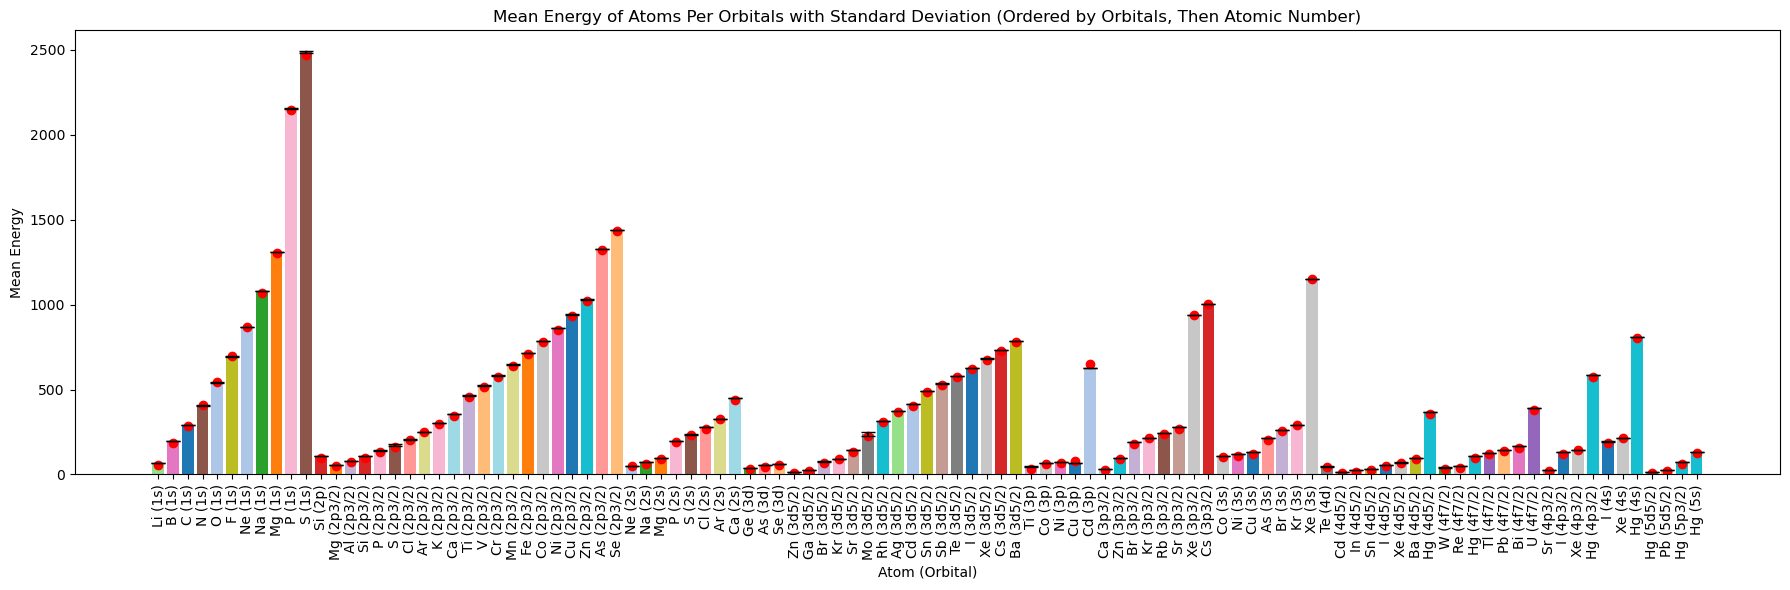

In [72]:
# Sort by orbitals first, then by atomic numbers
sorted_indices = np.argsort(orbitals, kind='mergesort')

# Reorder the data
atoms_sorted = np.array(atoms)[sorted_indices]
orbitals_sorted = np.array(orbitals)[sorted_indices]
mean_energies_sorted = np.array(mean_energies)[sorted_indices]
std_energies_sorted = np.array(std_energies)[sorted_indices]

# Generate colors for the bars
bar_colors_sorted = [atom_colors[atom] for atom in atoms_sorted]




# Plot
plt.figure(figsize=(18, 6))

plt.bar(
    range(len(mean_energies_sorted)),
    mean_energies_sorted,
    yerr=std_energies_sorted,
    capsize=5,
    tick_label=[f"{a} ({o})" for a, o in zip(atoms_sorted, orbitals_sorted)],
    color=bar_colors_sorted
)

# Plot experimental values
for i, (atom, orbital) in enumerate(zip(atoms_sorted, orbitals_sorted)):
    exp_value = get_exp_values(atom, orbital)
    if exp_value is not None:
        plt.scatter(i, exp_value, c = 'r')
        
        
plt.xticks(rotation=90)
plt.xlabel("Atom (Orbital)")
plt.ylabel("Mean Energy")
plt.title("Mean Energy of Atoms Per Orbitals with Standard Deviation (Ordered by Orbitals, Then Atomic Number)")
plt.tight_layout()
plt.show()

In [73]:
atomic_energies['Cd']['3p']

[624.9]